# Building a null model for knowledge graph feature explanation...

Basically... how does our node/feature set differ from a randomly chosen one?

The null model:

1. **Select *n* random sets of nodes from the same category as the target nodes. Select as many random nodes as there are target nodes.**
2. **Calculate various statistics on the random sets and the target nodes: average pairwise distance, Jaccard score, clustering score.**
3. **Compare the statistics between the random sets and the target nodes.**

In [1]:
# imports
import numpy as np
import pandas as pd
import networkx as nx
import kgfe

## 1. Load genes

In [2]:
data = pd.read_excel('LC_mets_prots_V1_V2_Compare.xlsx')

In [3]:
data.head()

,ID,Lasso_CV,Name,UniProt,Protein,PubChem,Chembl_ID,KEGG
0,met10,-0.100203,"1,2,4-benzenetriol",NaN,NaN,10787.0,CHEMBL3092389,C02814
1,met1054,-0.052794,pyridine,NaN,NaN,1049.0,CHEMBL266158,C00747
2,met1073,0.051544,uric acid,NaN,NaN,1175.0,CHEMBL792,C00366
3,met1091,-0.054557,formononetin,NaN,NaN,5280378.0,CHEMBL242341,C00858
4,met142,0.025830,4-Hydroxyvalproic acid,NaN,NaN,134467.0,CHEMBL3706504,C16649


In [4]:
data.shape

(92, 8)

In [5]:
data[~data.Chembl_ID.isna()]

,ID,Lasso_CV,Name,UniProt,Protein,PubChem,Chembl_ID,KEGG
0,met10,-0.100203,"1,2,4-benzenetriol",NaN,NaN,10787.0,CHEMBL3092389,C02814
1,met1054,-0.052794,pyridine,NaN,NaN,1049.0,CHEMBL266158,C00747
2,met1073,0.051544,uric acid,NaN,NaN,1175.0,CHEMBL792,C00366
3,met1091,-0.054557,formononetin,NaN,NaN,5280378.0,CHEMBL242341,C00858
4,met142,0.025830,4-Hydroxyvalproic acid,NaN,NaN,134467.0,CHEMBL3706504,C16649
6,met20,-0.045657,"2,6-dihydroxybenzoic acid",NaN,NaN,9338.0,CHEMBL454808,NaN
11,met305,0.035464,hexadecanedioic acid,NaN,NaN,10459.0,CHEMBL4519590,C19615
12,met31,-0.057506,"3,5-dichlorosalicylic acid",NaN,NaN,9445.0,CHEMBL449129,NaN
15,met53,0.033875,benzyldodecyldimethylammonium,NaN,NaN,8754.0,CHEMBL1907001,NaN
18,met675,0.029451,cytidine,NaN,NaN,596.0,CHEMBL78,NaN


## 2. Load SPOKE

In [6]:
spoke_graph = kgfe.spoke_loader.load_spoke_networkx('../../graph_utils/spoke_2021.jsonl.gz', directed=True,
                                                    verbose=False)

KeyboardInterrupt: 

In [ ]:
# undirected version of spoke graph
spoke_graph_ud = nx.Graph(spoke_graph)

In [ ]:
spoke_ids = list(sorted(spoke_graph_ud.nodes.keys()))

In [ ]:
names_to_ids = kgfe.graph_info.get_names_to_ids_networkx(spoke_graph_ud)

### Map proteins and metabolites to SPOKE nodes

In [ ]:
len(names_to_ids)

In [ ]:
uniprot_to_ids = kgfe.graph_info.spoke_identifiers_to_ids_networkx(spoke_graph_ud, 'Protein')

In [ ]:
chembl_to_ids = kgfe.graph_info.spoke_identifiers_to_ids_networkx(spoke_graph_ud, 'Compound')

In [ ]:
high_prots = data[(data['Lasso_CV'] > 0) & (~data['UniProt'].isna())]['UniProt']
low_prots = data[(data['Lasso_CV'] < 0) & (~data['UniProt'].isna())]['UniProt']
high_chems = data[(data['Lasso_CV'] > 0) & (~data['Chembl_ID'].isna())]['Chembl_ID']
low_chems = data[(data['Lasso_CV'] < 0) & (~data['Chembl_ID'].isna())]['Chembl_ID']

In [ ]:
high_chems_kegg = data[(data['Lasso_CV'] > 0) & (~data['KEGG'].isna())]['KEGG']
low_chems_kegg = data[(data['Lasso_CV'] < 0) & (~data['KEGG'].isna())]['KEGG']

In [ ]:
high_prots_spoke_ids = [uniprot_to_ids[x] for x in high_prots]
low_prots_spoke_ids = [uniprot_to_ids[x] for x in low_prots]

In [ ]:
high_prots_spoke_ids[:10]

In [ ]:
high_chems_spoke_ids = [(x, chembl_to_ids[x]) for x in high_chems if  x in chembl_to_ids]
low_chems_spoke_ids = [(x, chembl_to_ids[x]) for x in low_chems if  x in chembl_to_ids]

In [ ]:
high_chems_kegg_spoke_ids = [(x, chembl_to_ids[x]) for x in high_chems_kegg if  x in chembl_to_ids]
low_chems_kegg_spoke_ids = [(x, chembl_to_ids[x]) for x in low_chems_kegg if  x in chembl_to_ids]

Note: many chems were not able to be mapped onto SPOKE.

In [ ]:
high_chems_spoke_ids

In [ ]:
low_chems_spoke_ids

In [ ]:
high_chems_kegg_spoke_ids

In [ ]:
low_chems_kegg_spoke_ids

In [ ]:
high_chems_spoke_ids = high_chems_spoke_ids + high_chems_kegg_spoke_ids

In [ ]:
low_chems_spoke_ids = low_chems_spoke_ids + low_chems_kegg_spoke_ids

In [ ]:
high_chems_spoke_ids = [x[1] for x in high_chems_spoke_ids]
low_chems_spoke_ids = [x[1] for x in low_chems_spoke_ids]

In [ ]:
len(high_prots_spoke_ids)

## Compare node stats to a random model

Generate a bunch of random models, plot their stats?

Metrics we're using:

- Average pairwise distance between nodes - for all pairs of nodes, what is the length of the shortest path?
- Average Jaccard coefficient - this measures the fraction of neighboring nodes that are also in the given node set.
- Average clustering coefficient - among the neighbors of the given node, what fraction of all possible edges exist?

### Top protein null model

In [ ]:
protein_paths = nx.single_source_dijkstra(spoke_graph_ud, high_prots_spoke_ids[0])
protein_subgraph = nx.subgraph(spoke_graph, protein_paths[0].keys())
protein_subgraph_ud = nx.Graph(protein_subgraph)

In [ ]:
n_rands = 100
all_stats = []
%time all_stats = kgfe.explanations.null_graph_stats_networkx(protein_subgraph_ud, 'Protein', len(high_prots_spoke_ids), n_rands)

In [ ]:
random_stats = pd.DataFrame(all_stats)
random_stats

In [ ]:
%prun high_prots_stats = kgfe.explanations.graph_node_stats_networkx(spoke_graph_ud, high_prots_spoke_ids)
high_prots_stats

In [36]:
import matplotlib.pyplot as plt

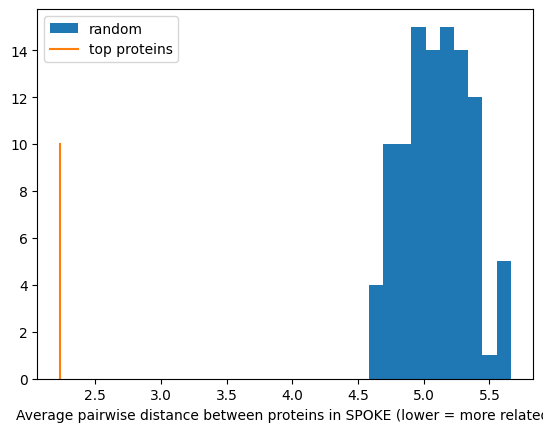

In [37]:
plt.hist(random_stats.average_pairwise_distance, bins=10, label='random')
plt.plot([high_prots_stats['average_pairwise_distance'], high_prots_stats['average_pairwise_distance']], [0, 10], label='top proteins')
plt.xlabel('Average pairwise distance between proteins in SPOKE (lower = more related)')
plt.legend()

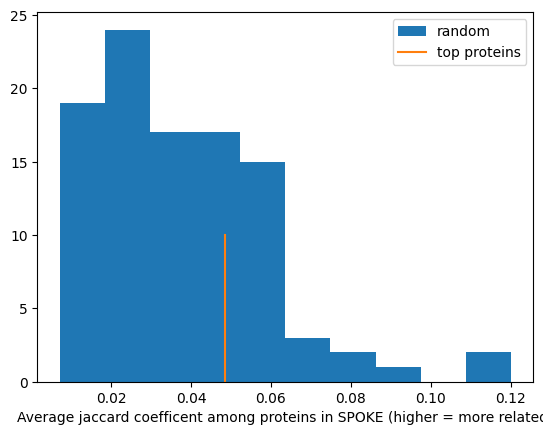

In [38]:
plt.hist(random_stats.average_jaccard, bins=10, label='random')
plt.plot([high_prots_stats['average_jaccard'], high_prots_stats['average_jaccard']], [0, 10], label='top proteins')
plt.xlabel('Average jaccard coefficent among proteins in SPOKE (higher = more related)')
plt.legend()

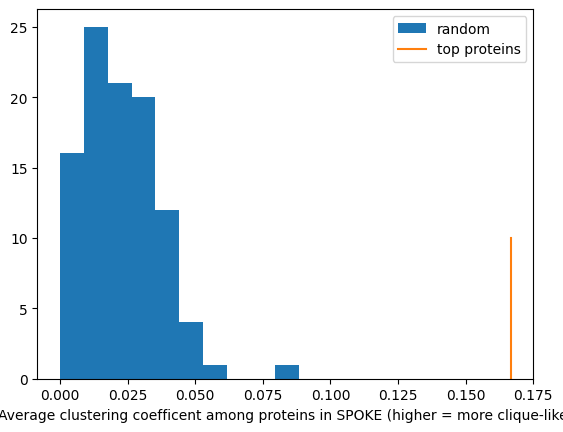

In [39]:
plt.hist(random_stats.clustering, bins=10, label='random')
plt.plot([high_prots_stats['clustering'], high_prots_stats['clustering']], [0, 10], label='top proteins')
plt.xlabel('Average clustering coefficent among proteins in SPOKE (higher = more clique-like)')
plt.legend()

### Negative-weighted protein null model

In [40]:
n_rands = 100
all_stats_low_prots = []
%time all_stats_low_prots = kgfe.explanations.null_graph_stats_networkx(protein_subgraph_ud, 'Protein', len(low_prots_spoke_ids), n_rands)

CPU times: user 14min 3s, sys: 6.4 s, total: 14min 10s
Wall time: 14min 10s


In [41]:
random_stats = pd.DataFrame(all_stats_low_prots)
random_stats

,average_pairwise_distance,clustering,average_jaccard
0,5.438735,0.017780,0.007586
1,4.454545,0.046494,0.082452
2,5.067194,0.036536,0.029703
3,5.407115,0.000000,0.038538
4,5.276680,0.034732,0.037879
...,...,...,...
95,5.169960,0.025190,0.053360
96,4.841897,0.035219,0.003315
97,5.707510,0.000000,0.005929
98,5.083004,0.013619,0.043513


In [46]:
%time low_prots_stats = kgfe.explanations.graph_node_stats_networkx(spoke_graph_ud, low_prots_spoke_ids)
low_prots_stats

CPU times: user 137 ms, sys: 0 ns, total: 137 ms
Wall time: 136 ms


{'average_pairwise_distance': 2.9881422924901186,
 'clustering': 0.10193315705228566,
 'average_jaccard': 0.04322024255345204}

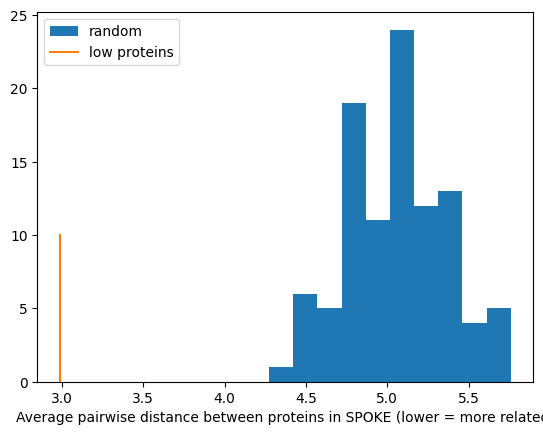

In [43]:
plt.hist(random_stats.average_pairwise_distance, bins=10, label='random')
plt.plot([low_prots_stats['average_pairwise_distance'], low_prots_stats['average_pairwise_distance']], [0, 10], label='low proteins')
plt.xlabel('Average pairwise distance between proteins in SPOKE (lower = more related)')
plt.legend()

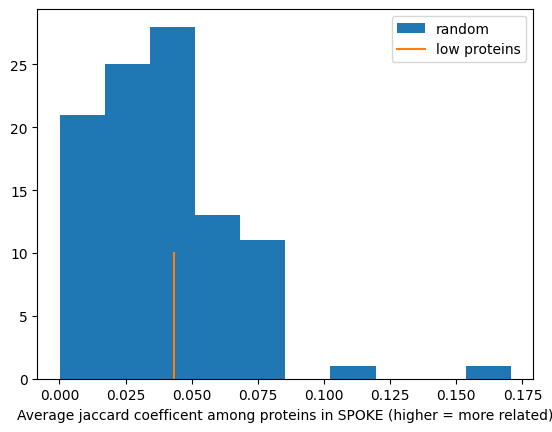

In [44]:
plt.hist(random_stats.average_jaccard, bins=10, label='random')
plt.plot([low_prots_stats['average_jaccard'], low_prots_stats['average_jaccard']], [0, 10], label='low proteins')
plt.xlabel('Average jaccard coefficent among proteins in SPOKE (higher = more related)')
plt.legend()

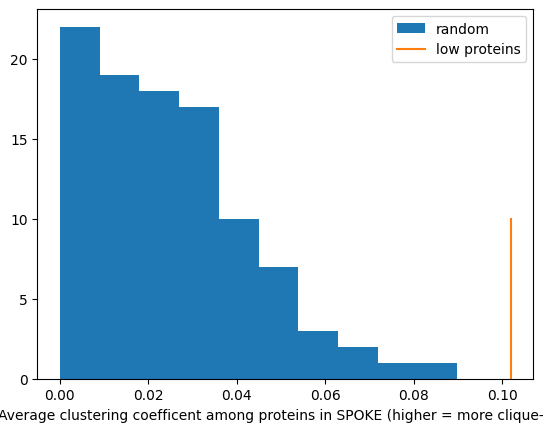

In [45]:
plt.hist(random_stats.clustering, bins=10, label='random')
plt.plot([low_prots_stats['clustering'], low_prots_stats['clustering']], [0, 10], label='low proteins')
plt.xlabel('Average clustering coefficent among proteins in SPOKE (higher = more clique-like)')
plt.legend()

### Top metabolite null model

In [42]:
n_rands = 100
all_stats_high_mets = []
for i in range(n_rands):
    random_prots = kgfe.graph_info.random_nodes_in_category(spoke_graph_ud, 'Compound', len(high_chems_spoke_ids))
    random_prots = [x[0] for x in random_prots]
    try:
        stats = kgfe.explanations.graph_node_stats(spoke_graph_ud, random_prots)
        all_stats.append(stats)
    except:
        continue

In [43]:
random_stats = pd.DataFrame(all_stats)
random_stats

,average_pairwise_distance,clustering,average_jaccard
0,4.780645,0.045884,0.030657
1,5.440860,0.006038,0.057168
2,5.129032,0.007644,0.037993
3,5.034409,0.005347,0.068817
4,5.180645,0.013383,0.015613
...,...,...,...
193,3.600000,0.079925,0.000000
194,3.733333,0.177778,0.022222
195,4.600000,0.000000,0.000000
196,4.333333,0.000000,0.000000


In [44]:
high_mets_stats = kgfe.explanations.graph_node_stats(spoke_graph_ud, high_chems_spoke_ids)
high_mets_stats

{'average_pairwise_distance': 3.7333333333333334,
 'clustering': 0.0638828733248748,
 'average_jaccard': 0.004943496063587373}

In [45]:
import matplotlib.pyplot as plt

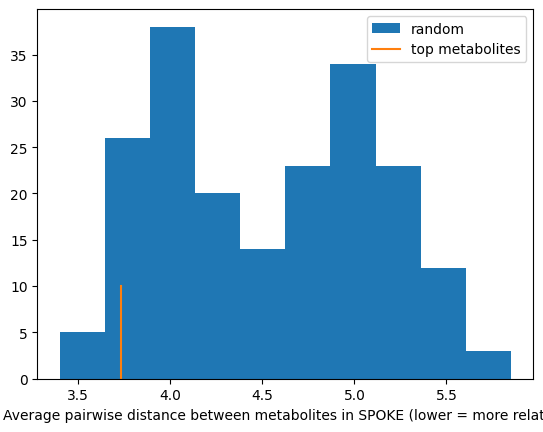

In [46]:
plt.hist(random_stats.average_pairwise_distance, bins=10, label='random')
plt.plot([high_mets_stats['average_pairwise_distance'], high_mets_stats['average_pairwise_distance']], [0, 10], label='top metabolites')
plt.xlabel('Average pairwise distance between metabolites in SPOKE (lower = more related)')
plt.legend()

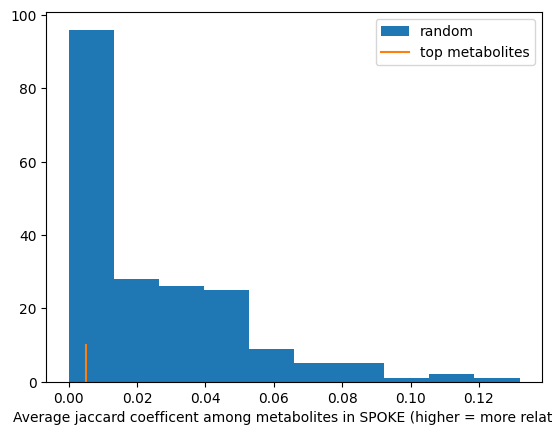

In [47]:
plt.hist(random_stats.average_jaccard, bins=10, label='random')
plt.plot([high_mets_stats['average_jaccard'], high_mets_stats['average_jaccard']], [0, 10], label='top metabolites')
plt.xlabel('Average jaccard coefficent among metabolites in SPOKE (higher = more related)')
plt.legend()

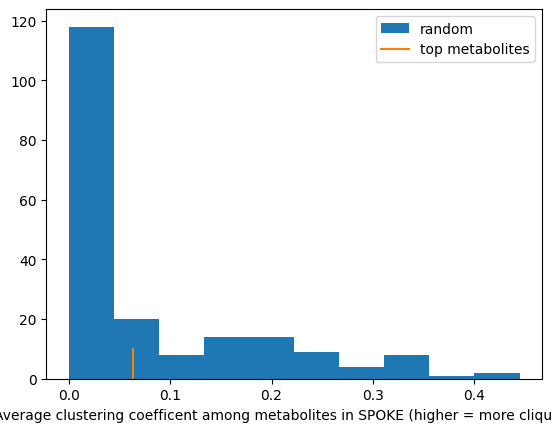

In [48]:
plt.hist(random_stats.clustering, bins=10, label='random')
plt.plot([high_mets_stats['clustering'], high_mets_stats['clustering']], [0, 10], label='top metabolites')
plt.xlabel('Average clustering coefficent among metabolites in SPOKE (higher = more clique-like)')
plt.legend()

### Negative-weighted metabolite null model

In [49]:
n_rands = 100
all_stats_low_mets = []
for i in range(n_rands):
    random_prots = kgfe.graph_info.random_nodes_in_category(spoke_graph_ud, 'Compound', len(low_chems_spoke_ids))
    random_prots = [x[0] for x in random_prots]
    try:
        stats = kgfe.explanations.graph_node_stats(spoke_graph_ud, random_prots)
        all_stats_low_mets.append(stats)
    except:
        continue

In [50]:
random_stats = pd.DataFrame(all_stats_low_mets)
random_stats

,average_pairwise_distance,clustering,average_jaccard
0,4.022222,0.266667,0.022222
1,4.066667,0.036009,0.031111
2,4.377778,0.030000,0.000000
3,4.355556,0.036716,0.012073
4,4.044444,0.000000,0.000000
...,...,...,...
95,3.888889,0.135255,0.000000
96,4.444444,0.040385,0.000000
97,3.711111,0.166667,0.007407
98,3.977778,0.130227,0.000855


In [51]:
low_mets_stats = kgfe.explanations.graph_node_stats(spoke_graph_ud, low_chems_spoke_ids)

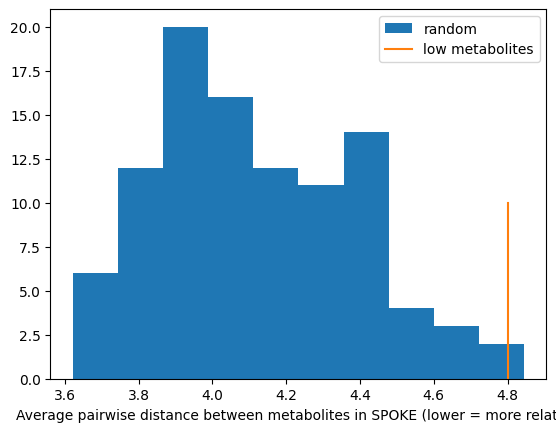

In [52]:
plt.hist(random_stats.average_pairwise_distance, bins=10, label='random')
plt.plot([low_mets_stats['average_pairwise_distance'], low_mets_stats['average_pairwise_distance']], [0, 10], label='low metabolites')
plt.xlabel('Average pairwise distance between metabolites in SPOKE (lower = more related)')
plt.legend()

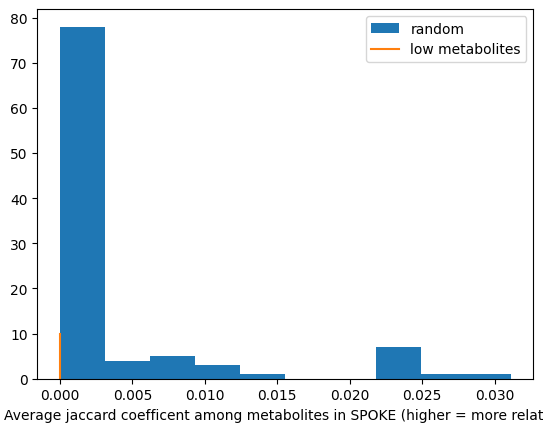

In [53]:
plt.hist(random_stats.average_jaccard, bins=10, label='random')
plt.plot([low_mets_stats['average_jaccard'], low_mets_stats['average_jaccard']], [0, 10], label='low metabolites')
plt.xlabel('Average jaccard coefficent among metabolites in SPOKE (higher = more related)')
plt.legend()

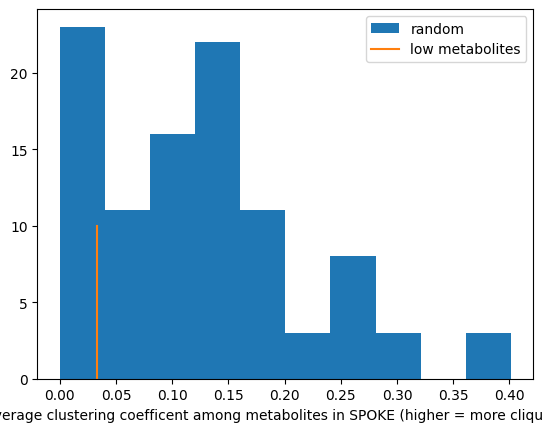

In [54]:
plt.hist(random_stats.clustering, bins=10, label='random')
plt.plot([low_mets_stats['clustering'], low_mets_stats['clustering']], [0, 10], label='low metabolites')
plt.xlabel('Average clustering coefficent among metabolites in SPOKE (higher = more clique-like)')
plt.legend()